# ALY 6080 - Integrated Experiential Learning 
# Group 5 
## ML Models Old Data(Task Form)
### Goup Members: Zhichao Xie, Sayli Bahekar, Emily (Zhaohui) Fan, Haoyun Chen, Gloria Ramirez
### Instructor: Prof. Shanu Sushmita
### Northeastern University CPS Analytics
#### Created on Nov 29, 2021


## Content
1. Data extraction
2. Data Exploration Analysis & Data Cleaning
3. Data Pre Processing
    * Feature Engineering
    * One Hot Encoding
    * Train Test Split
4. Data Modeling & Evaluation
    * Logistic Regression
    * Decision Tree
    * K-Nearest Neighbors (KNN)
    * Support Vector Machine (SVM)
5. K-fold
6. Model Selection

## 1. Data extraction  (Task Form)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import data Task Form
Tasks = pd.read_excel('/Users/zhichaoxie/Desktop/CPS2021 Fall/6080/project resources/Tasks form.xlsx', sheet_name="Tasks Form")

In [3]:
#Table preview
Tasks.head(10)

,External ID,Title,Sprint,Sprint End Date,Task Type,Project,Assigned to,Responsbile,Hours Spent,Progress,Activities,Tags,Task Difficulty,Stage,Client,Hours Open,Initially Planned Hours,Remaining Hours,Working hours to assign,Working hours to close
0,__export__.project_task_4668_2132a98f,WildLeaf Deploy To Deployment + Production(2135),Sprint 2135,2021-08-23,Deployment,Wild Leaf: Help (P22),Mir Muhammad Muzammil,NaN,0.00,0.00,NaN,SPLN,NaN,Complete,Wild Leaf Beverage,514.0,0.000000,0.000000,0.000000,24.000000
1,__export__.project_task_4615_92c814c2,NMS Export File Name Date Issue,Sprint 2134,2021-08-16,Bug Fix,Cellpoint: Odoo for Boost Files (P165),Farman Ahmad Cheema,Raheel Aslam,0.50,0.00,NaN,Priority,NaN,Complete,Cellpoint Corporation,720.0,0.000000,-0.500000,0.000000,23.276310
2,__export__.project_task_3811_375aea62,Brand Strategy: Recruitment Intro,Sprint 2122,2021-05-24,Development,PWX: HR (P61),Muhammad Afzaal,Raheel Aslam,3.42,57.00,NaN,NaN,3.0,Complete,EquityTeam,2857.0,6.000000,2.580000,0.000000,96.000000
3,__export__.project_task_3592_14b36f6e,Create a video for Dashboard activities,NaN,NaT,Configuration,Silverdale: Help (P12),Muhammad Afzaal,Muhammad Zubair,0.00,0.00,NaN,NaN,NaN,Complete,Silverdale Technology LLC,3189.0,0.000000,0.000000,0.000000,62.077778
4,__export__.project_task_3580_f38d1800,Personality: finish line2,Sprint 2120,2021-05-10,Development,PWX: Survey (P70),Muhammad Afzaal,Raheel Aslam,5.17,86.17,NaN,MA Review,3.0,Complete,EquityTeam,3220.0,6.000000,0.830000,0.000064,40.210341
5,__export__.project_task_3368_42f01262,Automatically change Sales Order quantities ba...,Sprint 2136,2021-08-30,Development,Wild Leaf: Consignment and Sales Improvements ...,Abdul Hameed,Muhammad Bilal,105.92,99.92,COE Required,MA Review,3.0,Complete,Wild Leaf Beverage,3579.0,106.000000,0.080000,767.930022,810.185022
6,__export__.project_task_3352_2b81901d,VAT on invoice not reflecting correctly,NaN,NaT,Bug Fix,MMH Dr. Clark: Help (P106),Jeff Gross,Muhammad Bilal,20.42,100.00,NaN,NaN,4.0,Complete,Mountain Meadow Herbs,3699.0,5.333333,-15.086667,0.000000,408.000000
7,__export__.project_task_3301_7a833859,Deployment 06/04/2021: Continuant,Sprint 2116,2021-04-12,Configuration,Continuant: AV Warehouse (P34),Jeff Gross,Wajahat Ali,1.50,0.00,NaN,NaN,NaN,Complete,Continuant,3896.0,0.000000,-1.500000,0.000000,4.000000
8,__export__.project_task_3282_95ce833b,"Add a ""Print Pack Labels"" button to Transfers ...",Sprint 2115,2021-04-05,Development,Wild Leaf: Help (P22),Jeff Gross,Aleem khan,6.67,100.00,NaN,NaN,2.0,Complete,Wild Leaf Beverage,4019.0,2.500000,-4.170000,0.000000,93.582667
9,__export__.project_task_3026_c6c10ee4,Survey Module,Sprint 2118,2021-04-26,Configuration,Silverdale: Help (P12),Naseeb Razaq,Fahad Hussain Malik,0.00,0.00,NaN,NaN,NaN,Complete,Silverdale Technology LLC,4399.0,0.000000,0.000000,0.009941,235.298552


In [4]:
Tasks.shape

(3636, 20)

In [5]:
# Type of Data Columns
Tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   External ID              3384 non-null   object        
 1   Title                    3384 non-null   object        
 2   Sprint                   2544 non-null   object        
 3   Sprint End Date          2544 non-null   datetime64[ns]
 4   Task Type                3298 non-null   object        
 5   Project                  3384 non-null   object        
 6   Assigned to              3378 non-null   object        
 7   Responsbile              2030 non-null   object        
 8   Hours Spent              3384 non-null   float64       
 9   Progress                 3384 non-null   float64       
 10  Activities               260 non-null    object        
 11  Tags                     1012 non-null   object        
 12  Task Difficulty          426 non-n

### Data Cleaning   (Model Features )

In [6]:
# Model Features 
df = Tasks[['Task Type','Assigned to','Task Difficulty','Responsbile','Client','Remaining Hours']]

In [7]:
# Data Frame Preview
df.head()

,Task Type,Assigned to,Task Difficulty,Responsbile,Client,Remaining Hours
0,Deployment,Mir Muhammad Muzammil,NaN,NaN,Wild Leaf Beverage,0.00
1,Bug Fix,Farman Ahmad Cheema,NaN,Raheel Aslam,Cellpoint Corporation,-0.50
2,Development,Muhammad Afzaal,3.0,Raheel Aslam,EquityTeam,2.58
3,Configuration,Muhammad Afzaal,NaN,Muhammad Zubair,Silverdale Technology LLC,0.00
4,Development,Muhammad Afzaal,3.0,Raheel Aslam,EquityTeam,0.83


In [8]:
# Type of Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Task Type        3298 non-null   object 
 1   Assigned to      3378 non-null   object 
 2   Task Difficulty  426 non-null    float64
 3   Responsbile      2030 non-null   object 
 4   Client           3384 non-null   object 
 5   Remaining Hours  3384 non-null   float64
dtypes: float64(2), object(4)
memory usage: 170.6+ KB


In [9]:
#check missing value
df.isnull().sum()

Task Type           338
Assigned to         258
Task Difficulty    3210
Responsbile        1606
Client              252
Remaining Hours     252
dtype: int64

In [10]:
# Assign 0 to missing values in Task Difficulty
df['Task Difficulty'] = df['Task Difficulty'].fillna(0)

<ipython-input-10-c13a21d1c78f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Task Difficulty'] = df['Task Difficulty'].fillna(0)


In [11]:
# Drop the observations with missing values
df_no_missing = df.dropna()

In [12]:
#check missing value
df_no_missing.isnull().sum()

Task Type          0
Assigned to        0
Task Difficulty    0
Responsbile        0
Client             0
Remaining Hours    0
dtype: int64

In [13]:
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 1 to 3582
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Task Type        2021 non-null   object 
 1   Assigned to      2021 non-null   object 
 2   Task Difficulty  2021 non-null   float64
 3   Responsbile      2021 non-null   object 
 4   Client           2021 non-null   object 
 5   Remaining Hours  2021 non-null   float64
dtypes: float64(2), object(4)
memory usage: 110.5+ KB


In [14]:
#summary statistics
df_no_missing.describe()

,Task Difficulty,Remaining Hours
count,2021.000000,2021.000000
mean,0.432459,-2.445001
std,0.945031,27.245397
min,0.000000,-1019.750000
25%,0.000000,-1.500000
50%,0.000000,0.000000
75%,0.000000,0.500000
max,4.000000,30.670000


### 3. Data Processing

In [15]:
#  Set Features for Model
X = df_no_missing.drop('Remaining Hours', axis = 1).copy()
X.head()

,Task Type,Assigned to,Task Difficulty,Responsbile,Client
1,Bug Fix,Farman Ahmad Cheema,0.0,Raheel Aslam,Cellpoint Corporation
2,Development,Muhammad Afzaal,3.0,Raheel Aslam,EquityTeam
3,Configuration,Muhammad Afzaal,0.0,Muhammad Zubair,Silverdale Technology LLC
4,Development,Muhammad Afzaal,3.0,Raheel Aslam,EquityTeam
5,Development,Abdul Hameed,3.0,Muhammad Bilal,Wild Leaf Beverage


In [16]:
# Target Variable for Model
Y = df_no_missing['Remaining Hours'].copy()
Y.head()

1   -0.50
2    2.58
3    0.00
4    0.83
5    0.08
Name: Remaining Hours, dtype: float64

### Feature Engineering


#### In order to build classification models, if ['Remaining Hours'] less or equal to 0 then assigen to complete(0), otherwise incomplete(1) 

In [17]:
# Recoding Target Variable
Y_complete_index = Y <= 0
Y[Y_complete_index] = 1
Y[-Y_complete_index] = 0
Y.unique()

array([1., 0.])

In [18]:
Y[-Y_complete_index].count()

739

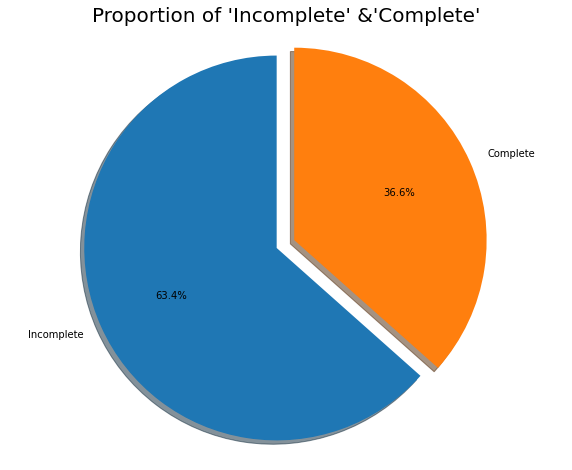

In [19]:
# Visualize target variable
labels = 'Incomplete', 'Complete'
sizes = [Y[Y_complete_index].count(), Y[-Y_complete_index].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of 'Incomplete' &'Complete'", size = 20)
plt.show()

In [20]:
# One Hot Encoding
X_encoded = pd.get_dummies(X, columns = ['Task Difficulty','Task Type', 'Assigned to','Responsbile','Client'])
X_encoded.head()

,Task Difficulty_0.0,Task Difficulty_1.0,Task Difficulty_2.0,Task Difficulty_3.0,Task Difficulty_4.0,Task Type_Bug Fix,Task Type_Client Meetings,Task Type_Configuration,Task Type_Creative,Task Type_Demo to the client,...,Client_EquityTeam,Client_KMI Zeolite,"Client_Mid-America Gardens, LLC","Client_Moln Solutions, LLC",Client_Mountain Meadow Herbs,Client_Perfect Golf Event,Client_Port Gamble Sâ€™Klallam Foundation,Client_Silverdale Technology LLC,Client_Wild Leaf Beverage,Client_Zuma Sales LLC
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.25,random_state = 42)

### 4. Data Modeling & Evaluation

##### 1. Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

In [23]:
# Confusion_matrix for Logistic Regression
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_auc_score
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))
print("\n")
print("roc_auc_score:",roc_auc_score(y_test,predictions))

[[ 83 110]
 [ 48 265]]


              precision    recall  f1-score   support

         0.0       0.63      0.43      0.51       193
         1.0       0.71      0.85      0.77       313

    accuracy                           0.69       506
   macro avg       0.67      0.64      0.64       506
weighted avg       0.68      0.69      0.67       506



roc_auc_score: 0.6383485904418216


In [24]:
# K-fold Cross Validation for Logistic Regression
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "f1")
print("F1 of 10-fold cross validation:", scores)
print("Average F1 of 10-fold cross validation:", scores.mean().round(2))

F1 of 10-fold cross validation: [0.78504673 0.7804878  0.78672986 0.8018018  0.83091787 0.76470588
 0.79227053 0.77777778 0.77209302 0.78301887]
Average F1 of 10-fold cross validation: 0.79


##### 2. Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 6, random_state=101)
tree.fit(x_train, y_train)
predictions = tree.predict(x_test)

# Confusion_matrix for Logistic Regression
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))
print("\n")
print("roc_auc_score:",roc_auc_score(y_test,predictions))

[[ 89 104]
 [ 48 265]]


              precision    recall  f1-score   support

         0.0       0.65      0.46      0.54       193
         1.0       0.72      0.85      0.78       313

    accuracy                           0.70       506
   macro avg       0.68      0.65      0.66       506
weighted avg       0.69      0.70      0.69       506



roc_auc_score: 0.6538926318925988


In [26]:
# Cross Validation for Decision Tree
scores = cross_val_score(tree, x_train, y_train, cv=10, scoring = "f1")
print("F1 of 10-fold cross validation:", scores)
print("Average F1 of 10-fold cross validation:", scores.mean().round(2))

F1 of 10-fold cross validation: [0.76995305 0.75598086 0.74757282 0.76635514 0.7826087  0.77669903
 0.79425837 0.75897436 0.78873239 0.79207921]
Average F1 of 10-fold cross validation: 0.77


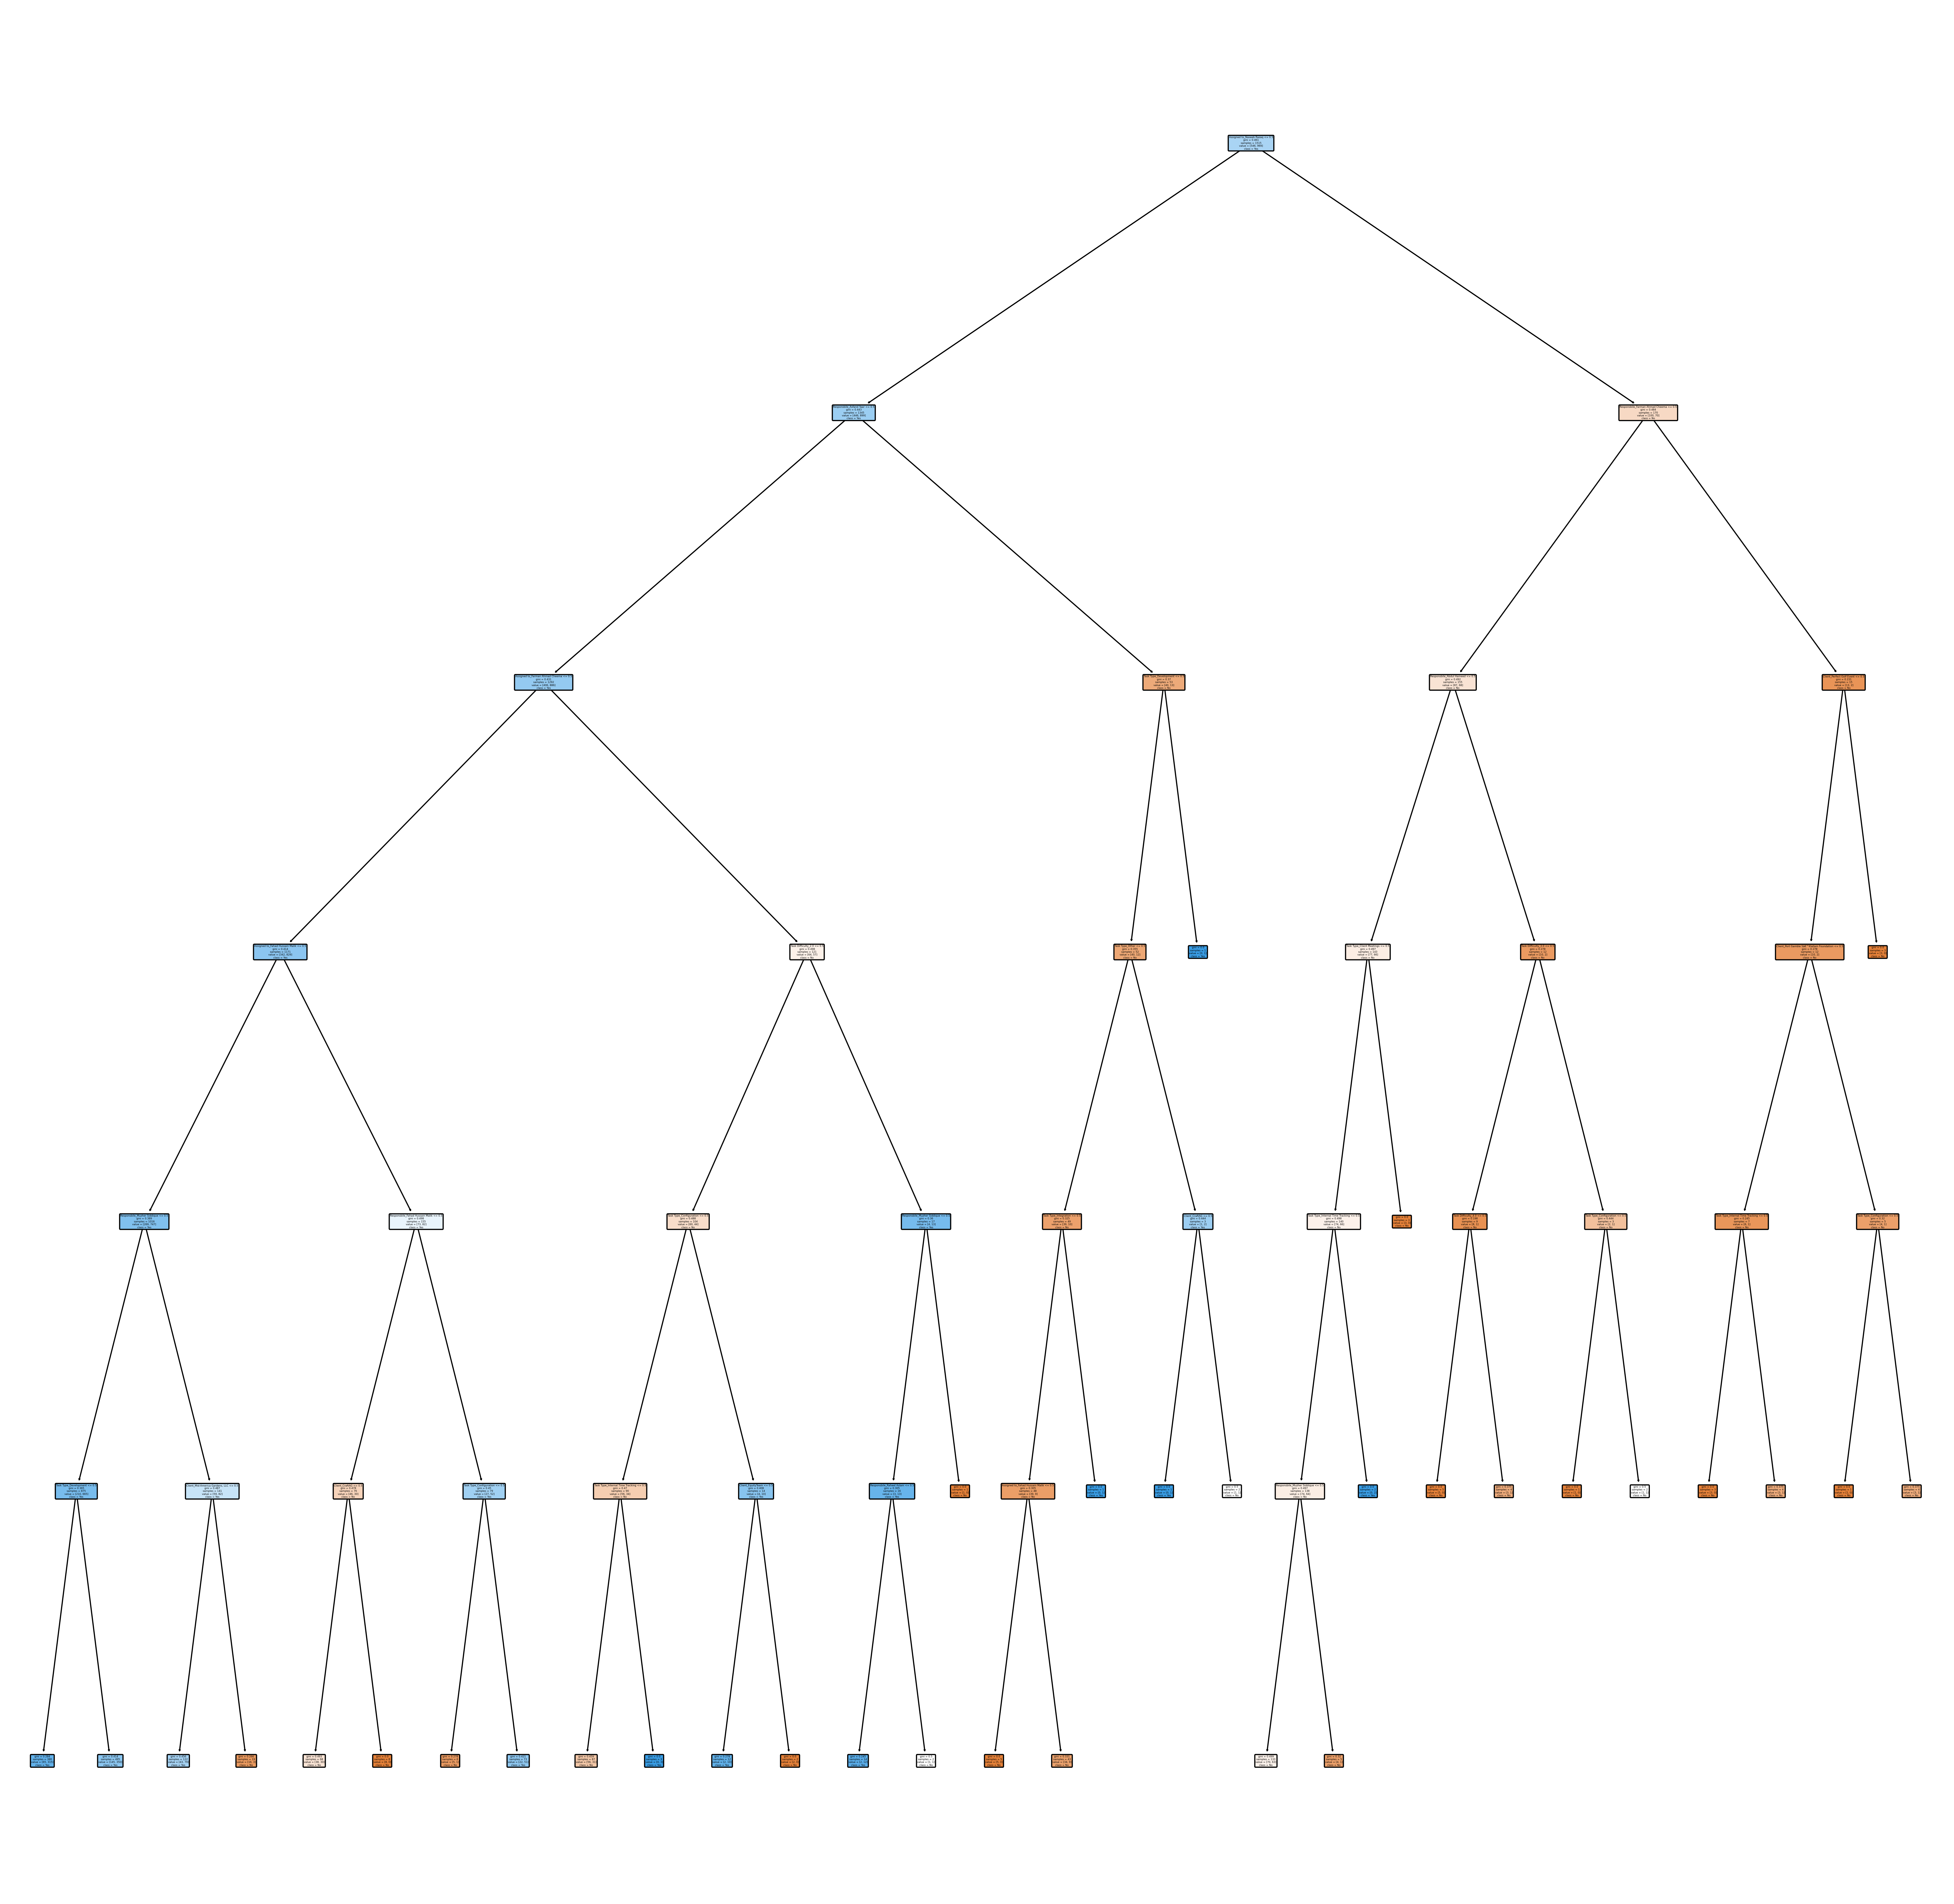

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize = (30, 30), dpi = 300)
plot_tree(tree.fit(x_train, y_train), filled = True, rounded = True, class_names = ['No', 'Yes'], feature_names = X_encoded.columns);

##### 3. K-Nearest Neighbors 

In [28]:
from sklearn.neighbors import KNeighborsClassifier
>>> knn_model = KNeighborsClassifier(n_neighbors=3)

In [29]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
test_preds = knn_model.predict(x_test)

# Confusion_matrix for KNN
print(confusion_matrix(y_test, test_preds))
print("\n")
print(classification_report(y_test, test_preds))
print("\n")
print("roc_auc_score:",roc_auc_score(y_test,test_preds))

[[ 84 109]
 [ 51 262]]


              precision    recall  f1-score   support

         0.0       0.62      0.44      0.51       193
         1.0       0.71      0.84      0.77       313

    accuracy                           0.68       506
   macro avg       0.66      0.64      0.64       506
weighted avg       0.67      0.68      0.67       506



roc_auc_score: 0.6361469317485805


In [31]:
# Cross Validation for KNN
scores = cross_val_score(knn_model, x_train, y_train, cv=10, scoring = "f1")
print("F1 of 10-fold cross validation:", scores)
print("Average f1 of 10-fold cross validation:", scores.mean().round(2))

F` of 10-fold cross validation: [0.77073171 0.70935961 0.75490196 0.72727273 0.76616915 0.77294686
 0.75862069 0.74876847 0.74641148 0.74509804]
Average f1 of 10-fold cross validation: 0.75


##### 4. Support Vector Machine

In [32]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train, y_train)

SVC()

In [33]:
sv_predictions = svc.predict(x_test)

# # Confusion_matrix for SVM
print(confusion_matrix(y_test, sv_predictions))
print("\n")
print(classification_report(y_test, sv_predictions))
print("\n")
print("roc_auc_score:",roc_auc_score(y_test,sv_predictions))

[[ 89 104]
 [ 51 262]]


              precision    recall  f1-score   support

         0.0       0.64      0.46      0.53       193
         1.0       0.72      0.84      0.77       313

    accuracy                           0.69       506
   macro avg       0.68      0.65      0.65       506
weighted avg       0.69      0.69      0.68       506



roc_auc_score: 0.6491002996242281


In [34]:
# Cross Validation for SVM
scores = cross_val_score(svc, x_train, y_train, cv=10, scoring = "f1")
print("F1 of 10-fold cross validation:", scores)
print("Average F1 of 10-fold cross validation:", scores.mean().round(2))

F1 of 10-fold cross validation: [0.77934272 0.75238095 0.76923077 0.77419355 0.8019802  0.76616915
 0.79802956 0.7902439  0.77981651 0.8       ]
Average F1 of 10-fold cross validation: 0.78
